In [1]:
import geopandas as geopd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import shapely as shp
from pyproj import Transformer
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Daten einlesen
df = pd.read_csv('Messstellen.csv')
df = df.dropna()

# erstelle die benötigten Geometrien
geometry = []
for index, row in df.iterrows():
    geometry.append(shp.geometry.Point(row.Hochwert, row.Rechtswert))

# speichere im geopandas-Format
gdf = geopd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

# Projektion in UTM 
wgs = gdf.to_crs('EPSG:25832')

# speichere als Shape-Datei
wgs.to_file('Messstellen.shp')

In [2]:
# Read the shapefile and related data
gdf = geopd.read_file('Messstellen.shp')
BW_shapefile = geopd.read_file('AX_Region.shp')
region = BW_shapefile.iloc[10],BW_shapefile.iloc[11]
region = pd.DataFrame(region)
df = geopd.GeoDataFrame(region)
bw = df.to_file('BW.shp')
bw = geopd.read_file('BW.shp')

,GW-Nummer,Rechtswert,Hochwert,geometry
0,0048/308-5,49.095937,8.560834,POINT (467940.074 5438213.596)
1,0270/210-2,48.924392,8.299936,POINT (448718.264 5419287.032)
2,0091/210-6,48.913946,8.227827,POINT (443424.313 5418176.991)
3,0263/210-2,48.942415,8.319081,POINT (450138.634 5421277.779)
4,0353/258-0,49.180410,8.491743,POINT (462959.323 5447635.751)
...,...,...,...,...
122,0248/210-7,48.946050,8.333293,POINT (451182.870 5421672.628)
123,0962/258-3,49.147845,8.477740,POINT (461913.851 5444022.518)
124,0299/308-7,49.131305,8.555516,POINT (467574.911 5442147.613)
125,1124/308-6,49.133398,8.528245,POINT (465586.947 5442392.315)


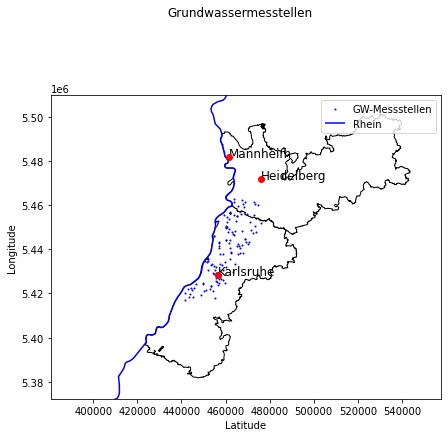

In [4]:
#You can use different 'cmaps' such as jet, plasm,magma, infereno,cividis, binary...(I simply chose cividis)
fig, ax = plt.subplots(figsize=(7,7))
gdf.plot(ax=ax, color='blue', markersize=1, zorder=2, label='GW-Messstellen');
bw.plot(ax=ax, facecolor='w', edgecolor='black',alpha=1,linewidth=1)
#ax.plot(456387.80,5428392.91, color = 'black',marker='o')
#ax.plot(461555.05, 5481940.85, color='black', marker='o', label='Mannheim')
fig.suptitle('Grundwassermesstellen', fontsize='large')
ax.set_xlabel('Latitude', fontsize='medium')
ax.set_ylabel('Longitude', fontsize='medium')

def plot_cities(ax):
    # plot city dots with annotation, finalize plot
    # lat/lon coordinates of five cities in Bangladesh
    lats = [5428392.91, 5481940.85, 5471836.05,]
    lons = [456387.80, 461555.05, 476232.86,]
    cities = ['Karlsruhe', 'Mannheim', 'Heidelberg',]
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5,)
        ax.text(lon + 0.01, lat + 0.01, city, fontsize='large')
plot_cities(ax)
river = geopd.read_file('Europe_Hydrography.shp')

rhein = river.iloc[312],river.iloc[313]
rhein = pd.DataFrame(rhein)
rheindf = geopd.GeoDataFrame(rhein,crs="EPSG:4326")
wgs_rhein = rheindf.to_crs('EPSG:25832')
wgs_rhein.to_file('Rhein.shp')
#rheindf = rheindf.T
#rhein_shape = rheindf.to_file('Rhein.shp')
rhein_df = geopd.read_file('Rhein.shp')

rhein_df.plot(ax=ax, color='blue', markersize=1, zorder=2, label='Rhein')
ax.set_ylim(5372205.784498316, 5510019.067042622)
ax.legend()